In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import linear_model

import pickle

In [3]:
# Import data
sensors = pd.read_csv('../data/sensors.csv', sep=',')
target = pd.read_csv('../data/reactor_pressure_target.csv', sep=',')

sensors.head()

,timestamp,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47
0,2016-10-24 16:00:00,NaN,NaN,NaN,-0.005383,6.251910,0.022304,1.466704,11.173872,236232.328494,239141.739468,236047.718208,10388.134152,10301.147575,10514.105249,45.330807,114.308237,130.949307,41.057286,105.973865,129.767924,643.938028,641.805951,37.864843,105.766633,131.088479,647.015112,33.219880,105.078138,629.911638,630.898807,620.607633,641.471009,119.665939,9.468025,8.720790,9.491729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10518.438958,235581.702442,10271.912950,1.718926,64589.460605
1,2016-10-24 17:00:00,NaN,NaN,NaN,0.103383,6.465077,0.011693,1.267009,12.987551,236736.358537,237598.686177,234667.198152,10342.275453,10243.497056,10522.399442,45.346491,113.573405,131.134979,40.879320,106.376817,131.056496,645.646962,644.467521,37.998703,107.147223,131.258352,646.445612,32.923039,108.432319,630.888662,631.148243,617.627299,649.892132,120.168816,9.492814,8.672949,9.442881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10529.380416,236303.564486,10185.329909,18.454216,64736.370856
2,2016-10-24 18:00:00,NaN,NaN,NaN,-0.004852,6.315273,-0.003072,1.216848,12.824779,235780.400580,238313.969270,236595.519278,10311.392170,10295.566635,10545.026172,42.496189,113.960934,130.360285,40.834278,105.843890,130.375261,644.225458,643.544517,37.934885,107.696556,130.797973,647.069870,33.152057,106.901200,626.594563,631.062718,618.326995,636.883422,120.237631,9.501467,8.754266,9.406755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10472.545087,237051.461382,10149.728277,5.764785,64638.208960
3,2016-10-24 19:00:00,NaN,NaN,NaN,0.131502,6.437954,-0.012240,1.162371,6.678317,236091.381252,238923.480515,236212.885254,10231.973667,10208.097469,10417.070015,45.546485,114.131709,131.414026,40.522995,106.029397,130.273033,643.569251,644.812569,38.028431,107.399047,130.747269,650.295140,33.059196,102.416291,627.653857,630.178126,620.007032,646.110975,120.196744,9.521940,8.679888,9.462626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10481.158308,236368.845544,10182.537090,8.330154,64406.958929
4,2016-10-24 20:00:00,98.912665,0.336871,27.897405,0.018193,6.217860,0.015535,1.287526,5.741191,234844.641480,237358.261098,235495.677673,10323.031469,10202.392433,10470.840600,49.768515,113.853062,130.553195,40.846358,105.259318,130.954900,644.418385,644.911397,38.234886,108.439758,131.392929,649.625562,33.268355,103.393210,633.470941,628.608183,614.648944,654.108591,120.444513,9.524660,8.737128,9.417243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10488.938655,235311.403403,10064.373899,7.222850,64137.307707


In [4]:
# Missed values
sensors.fillna(method='ffill', inplace=True)

sensors.f_36.fillna(sensors.f_36.median(), inplace=True)
sensors.f_37.fillna(sensors.f_37.median(), inplace=True)
sensors.f_38.fillna(sensors.f_38.median(), inplace=True)
sensors.f_39.fillna(sensors.f_39.median(), inplace=True)
sensors.f_40.fillna(sensors.f_40.median(), inplace=True)

# Missed data for first 12 records
sensors.f_0.fillna(98.912665, inplace=True)
sensors.f_1.fillna(0.336871, inplace=True)
sensors.f_2.fillna(27.897405, inplace=True)

sensors.f_41.fillna(-0.029044, inplace=True)
sensors.f_42.fillna(0.016089, inplace=True)

sensors = sensors.merge(target, on='timestamp', how='left')

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


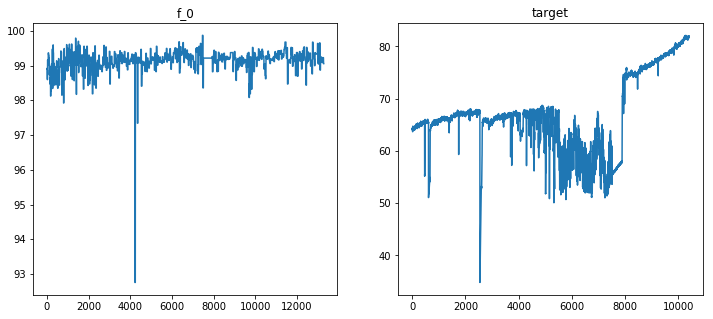

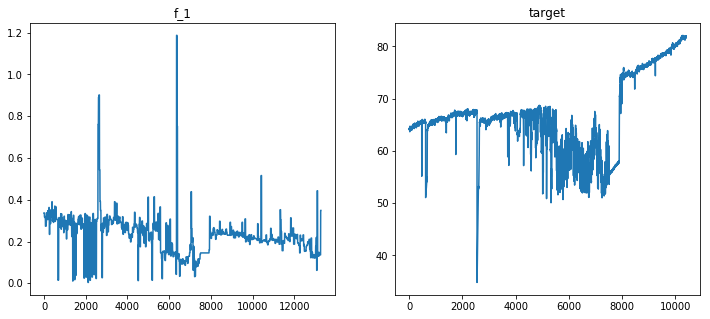

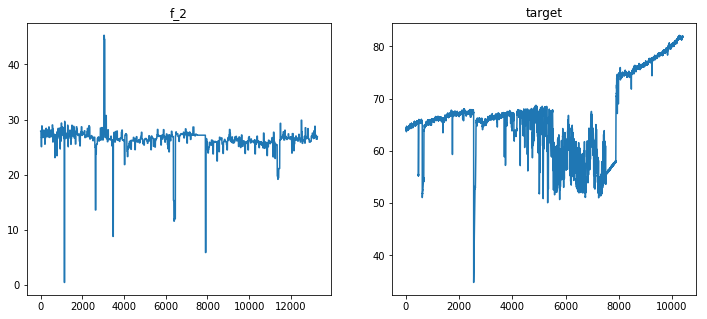

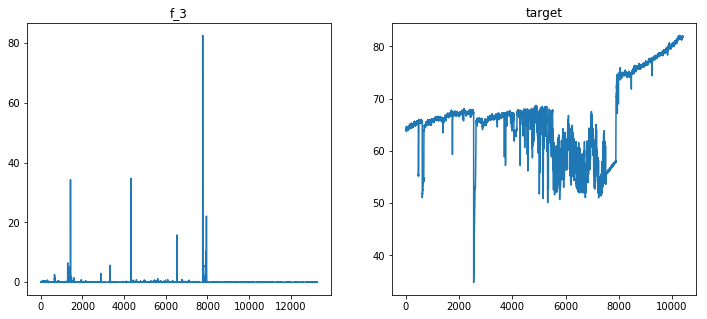

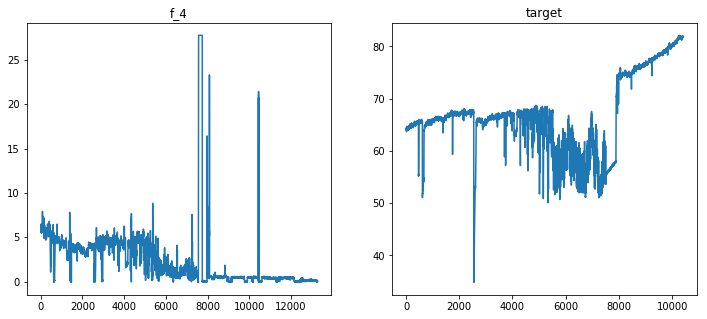

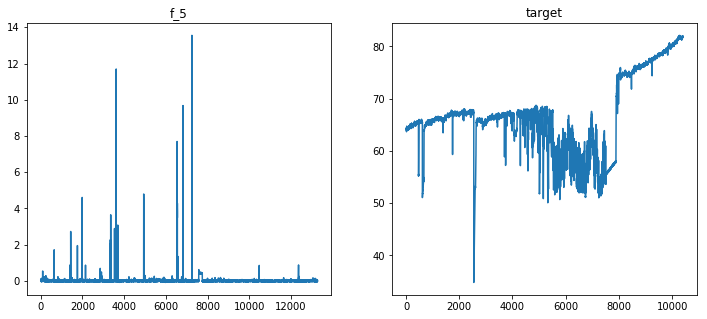

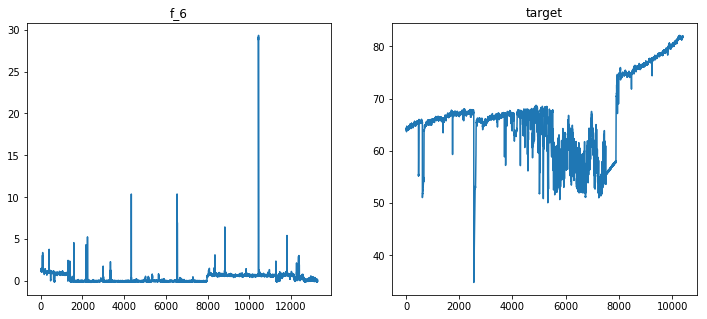

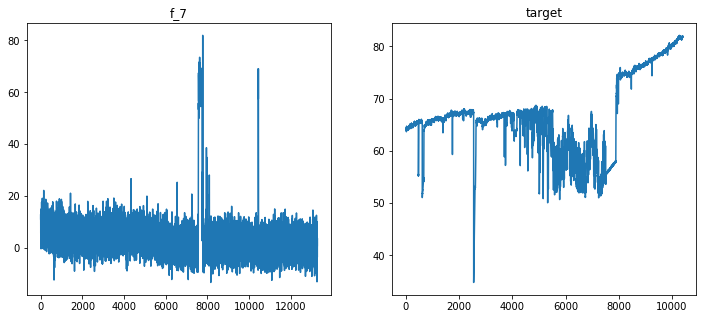

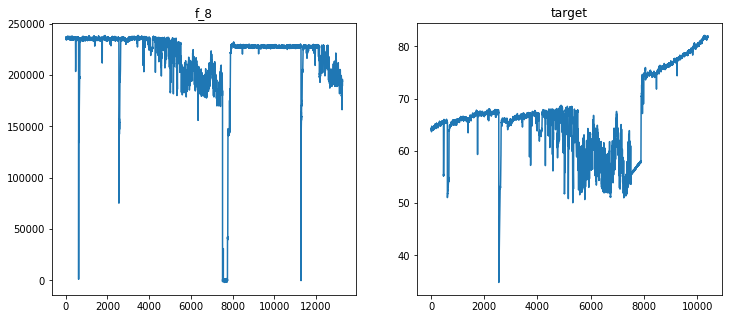

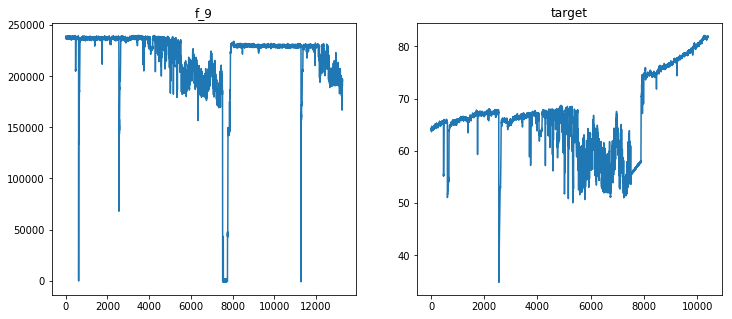

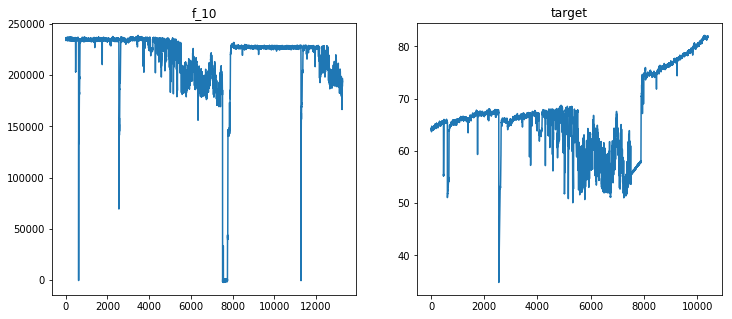

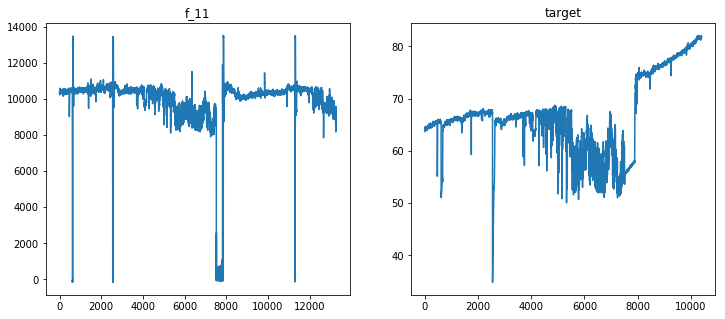

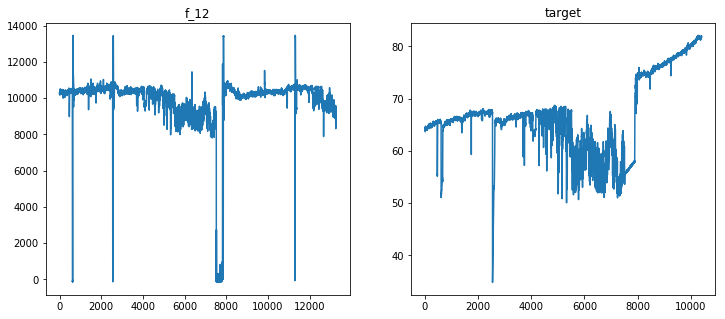

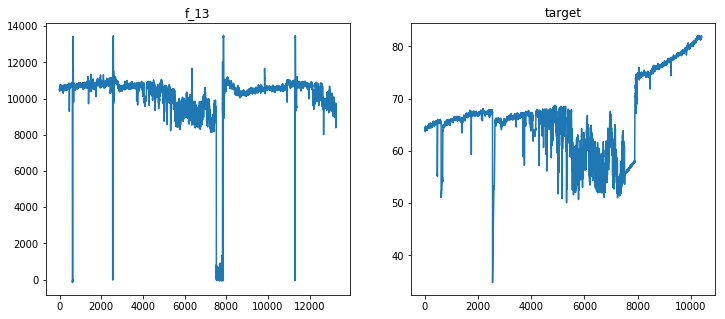

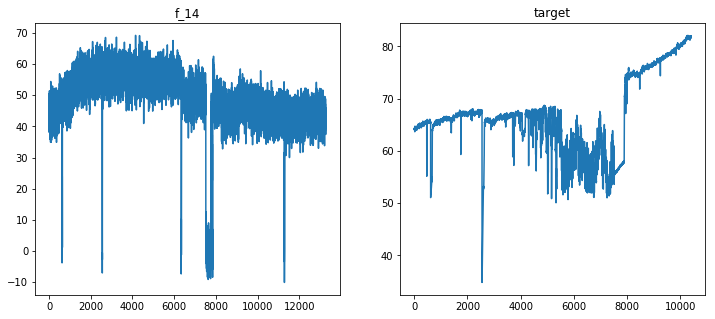

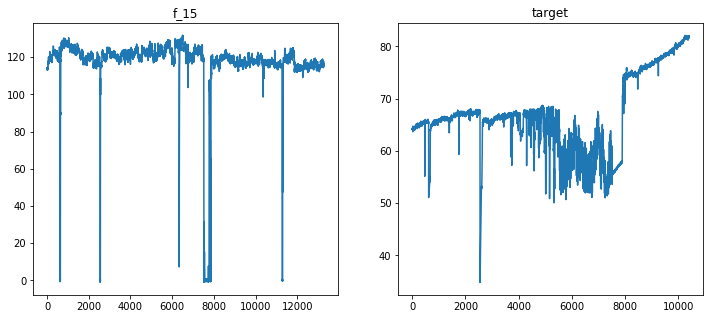

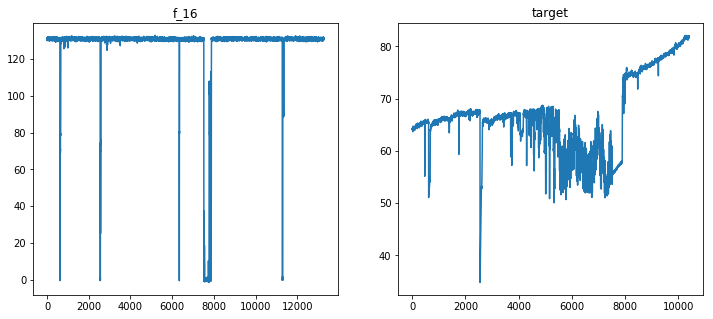

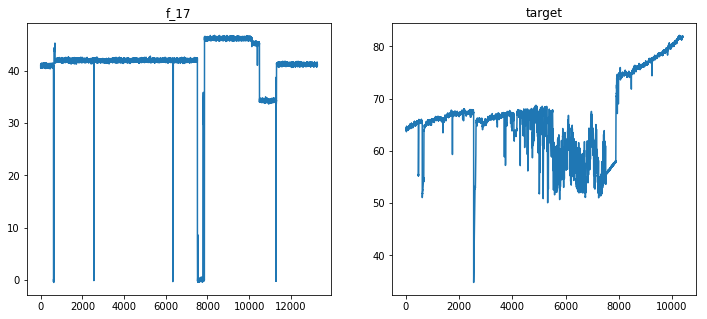

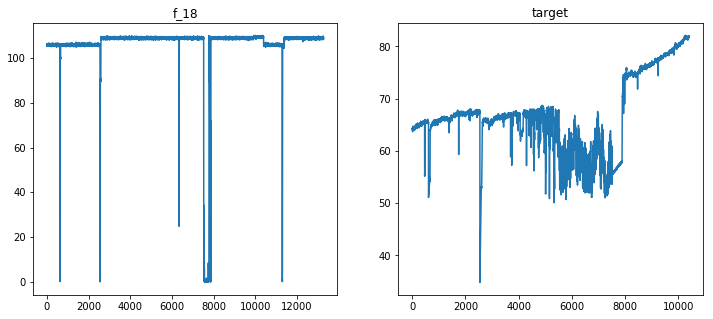

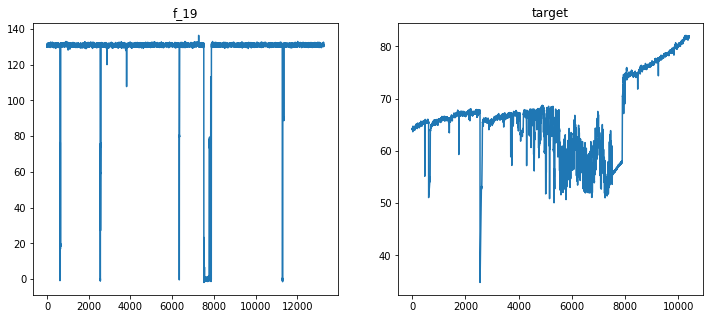

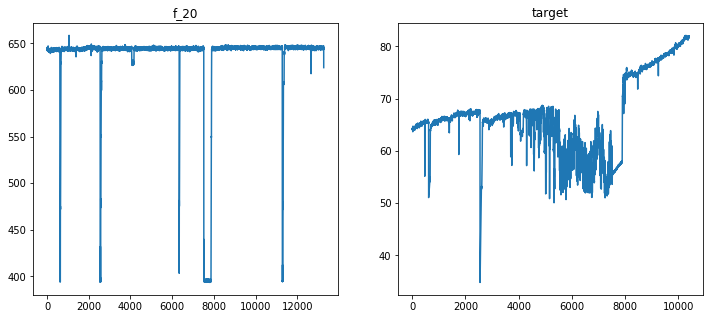

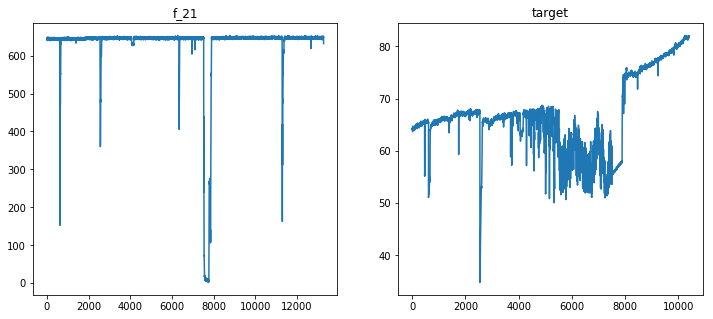

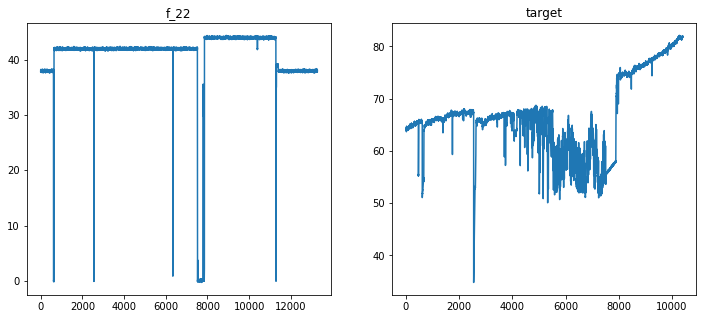

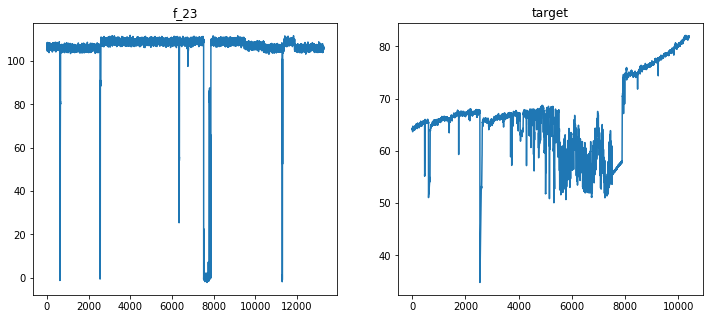

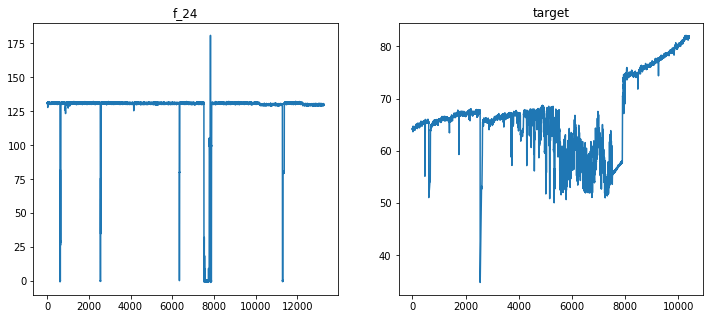

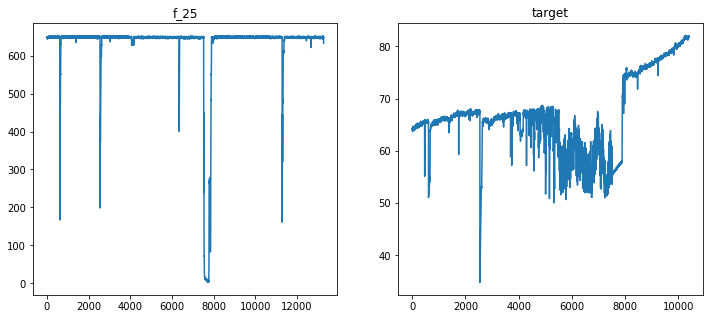

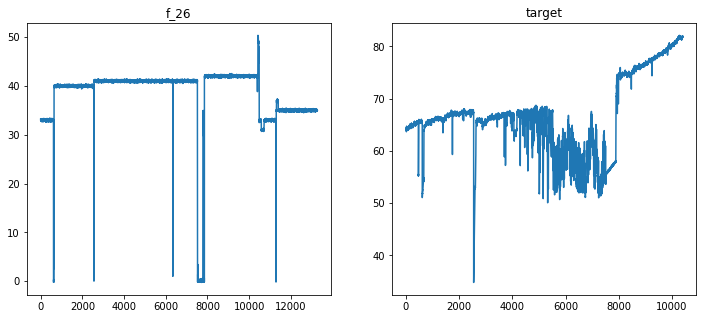

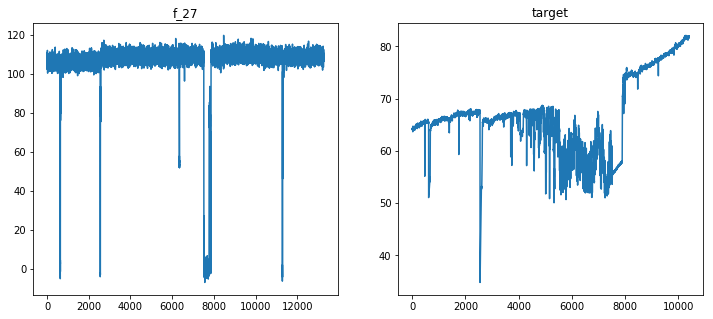

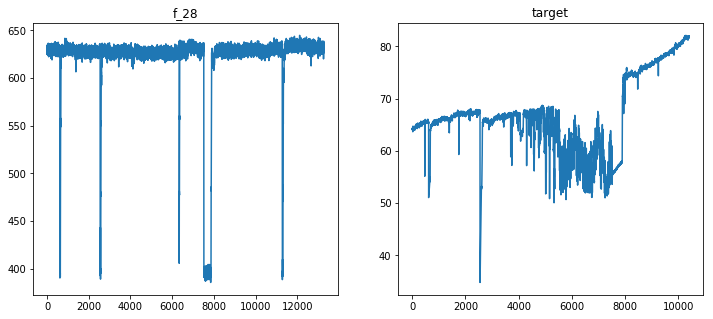

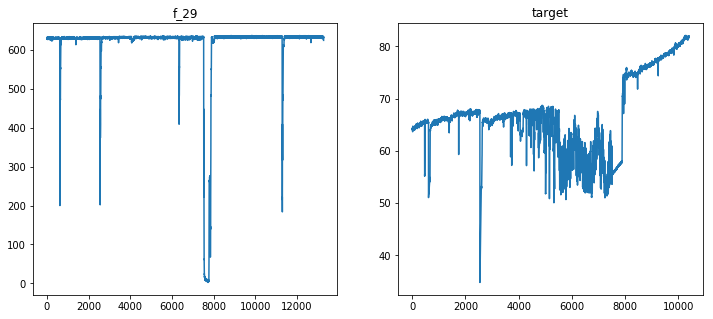

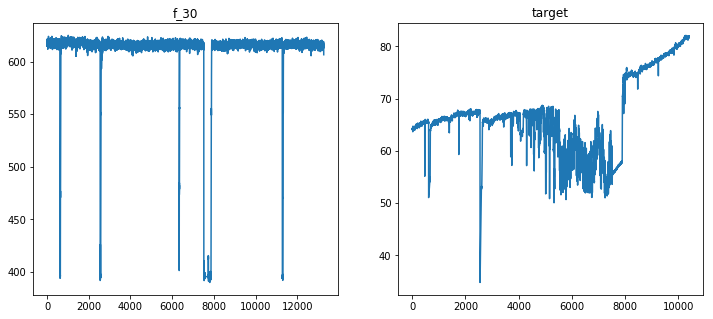

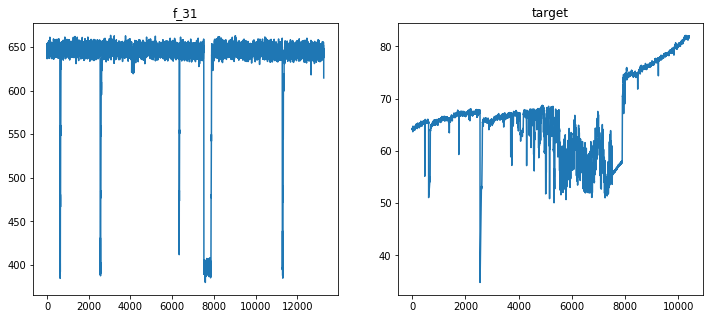

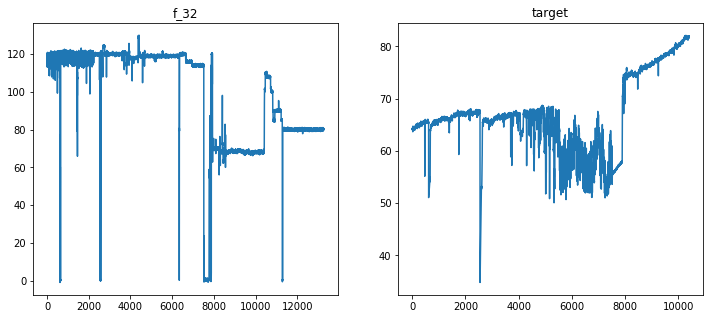

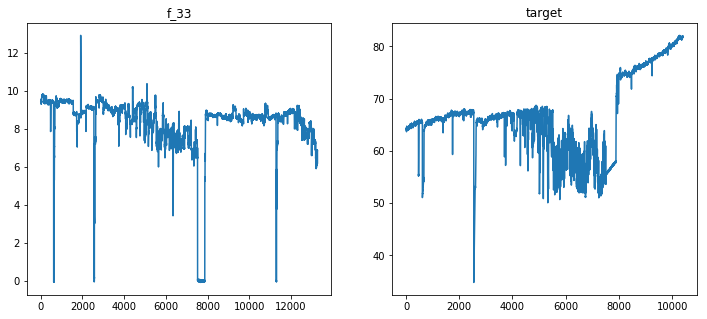

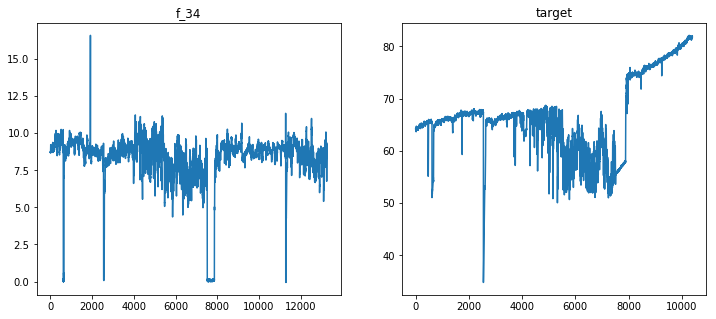

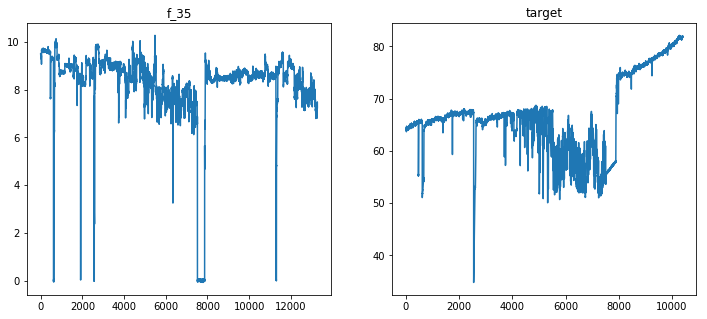

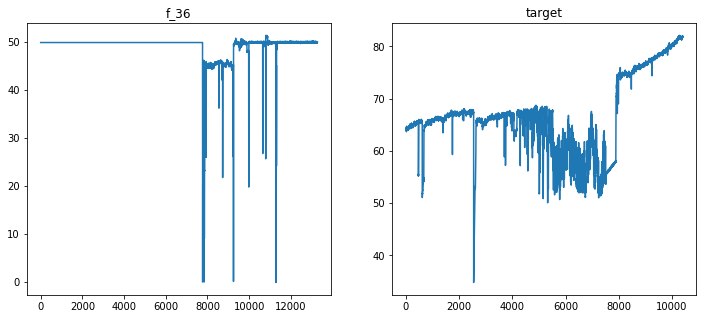

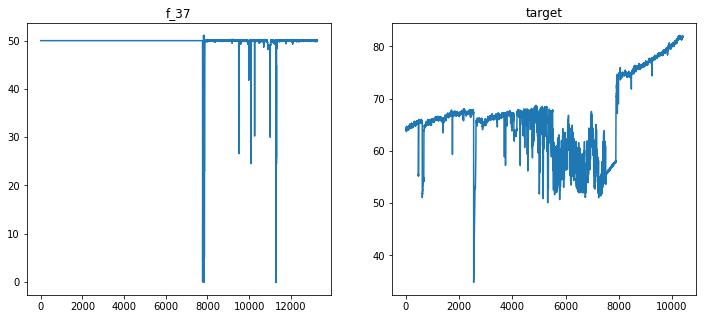

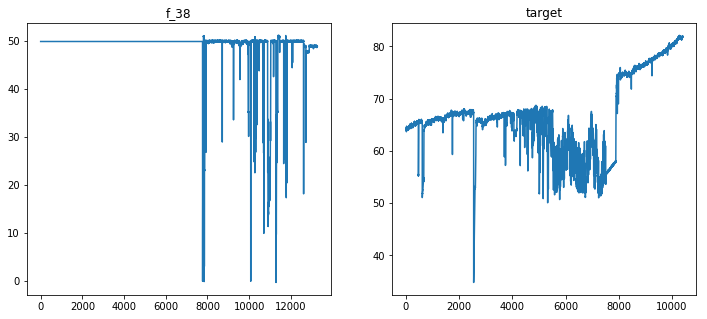

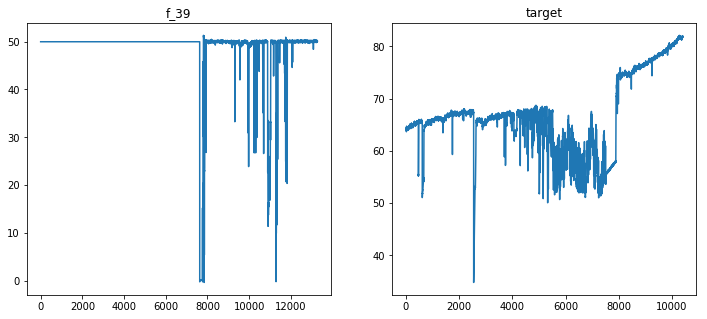

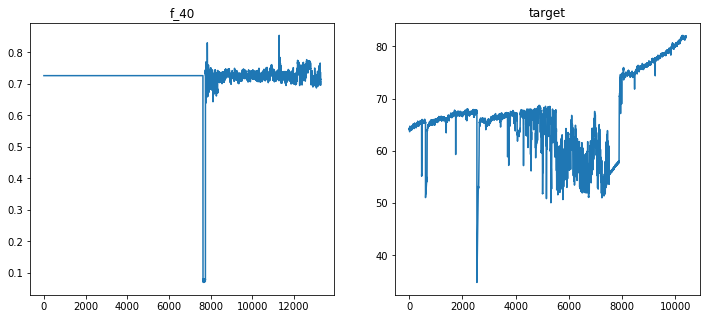

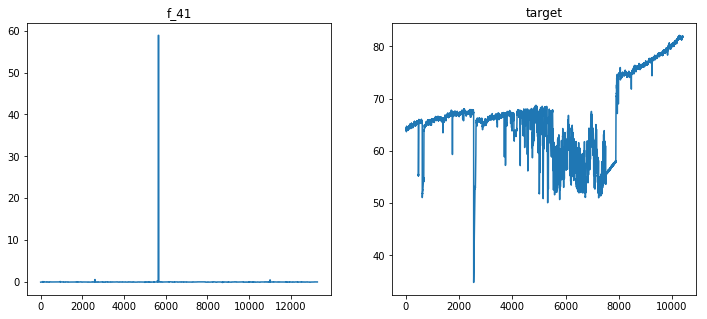

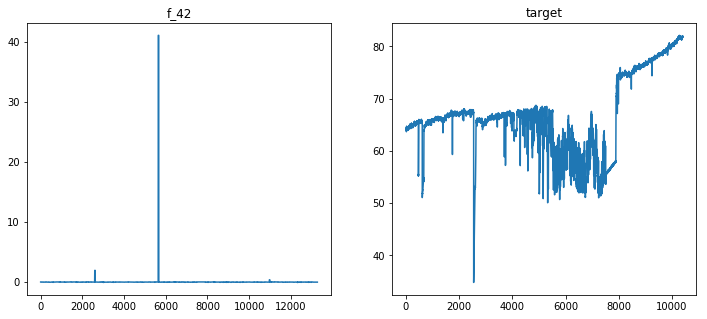

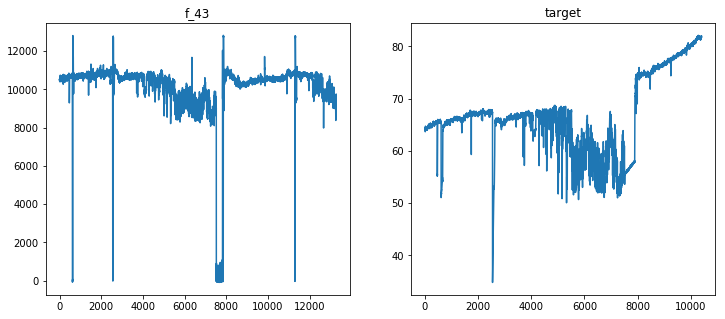

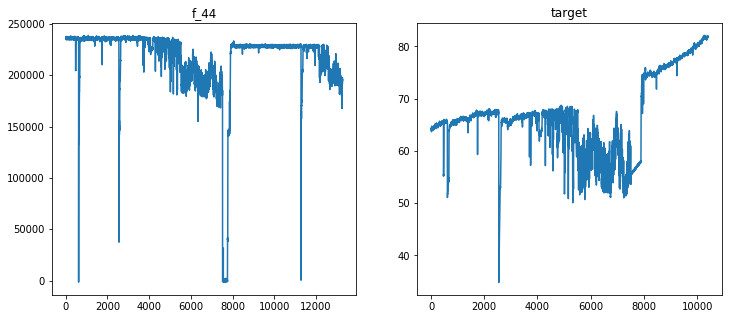

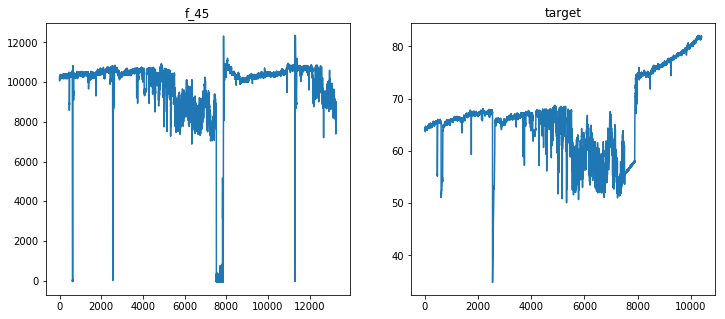

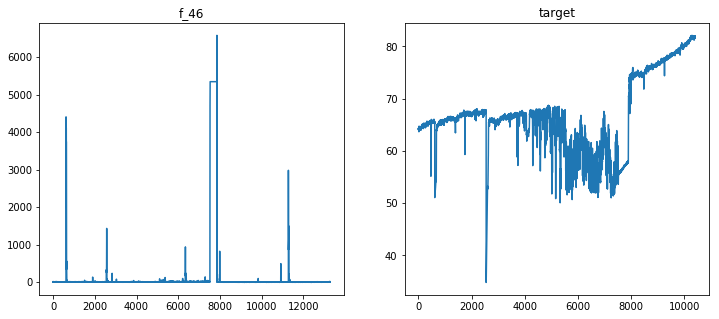

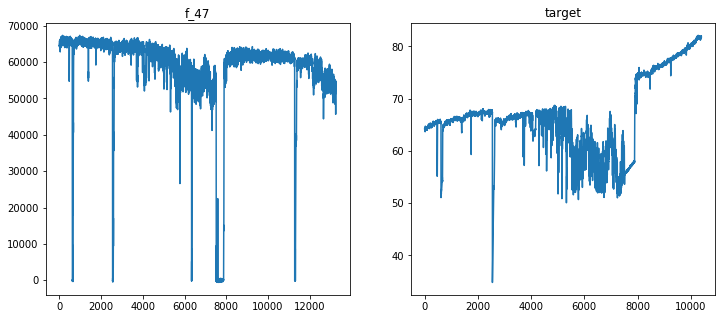

In [5]:
# Plot charts for all variables vs target

fields = sensors.columns[1:-1].tolist()

for f in fields:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 5))
    ax1.set_title(f)
    ax1.plot(sensors.loc[:, f])
    ax2.set_title('target')
    ax2.plot(sensors.loc[:, 'target'])

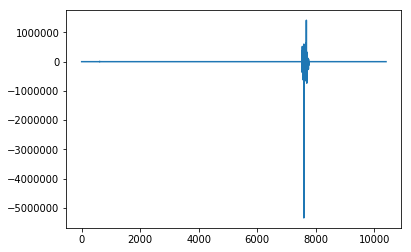

In [6]:
# f_8 выглядит очень похоже на поведение target
# Так как f_8 - расход жидкости, такая закономерность логична6 dP = C * flow_rate, C - коэффициент сопротивления
# Попробуем найти этот коэффициент

sensors['C'] = sensors['target'] / sensors['f_8'] * 250000
sensors['C'].plot()

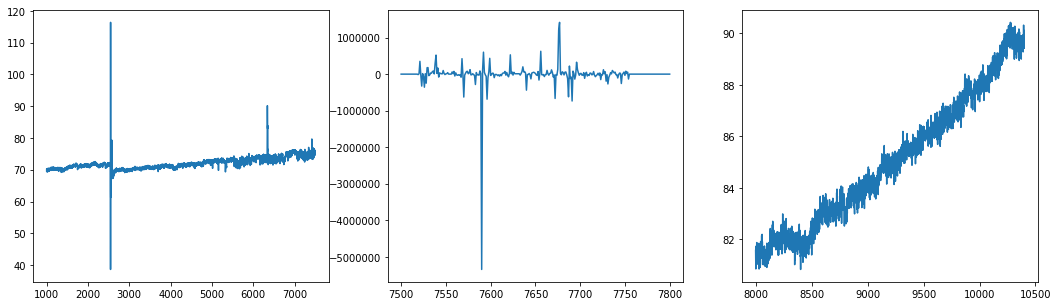

In [7]:
# Рассмотрим внимательнее несколько областей
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18, 5))
ax1.plot(sensors.loc[1000:7500, 'C'])
ax2.plot(sensors.loc[7500:7800, 'C'])
ax3.plot(sensors.loc[8000:, 'C'])



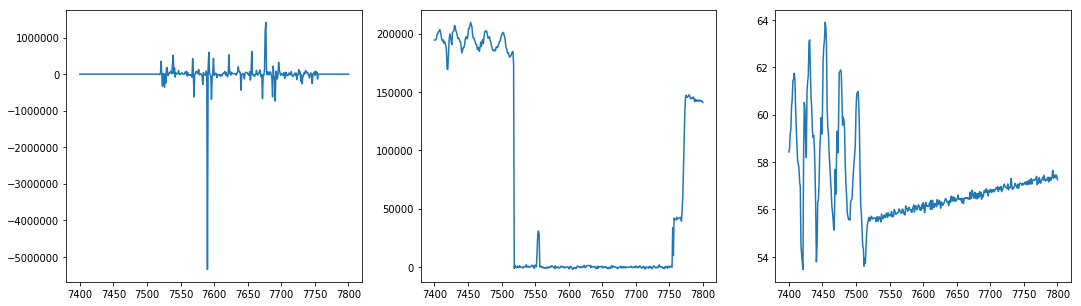

In [8]:
# Видно, что в интервале от 7500 до 7800 - этот подход не работает
# В остальных областях видно, что коэффициент представлен кусочно-линейными функциями времени
# Рассмотрим внимательнее выброс
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18, 5))
ax1.plot(sensors.loc[7400:7800, 'C'])
ax2.plot(sensors.loc[7400:7800, 'f_8'])
ax3.plot(sensors.loc[7400:7800, 'target'])

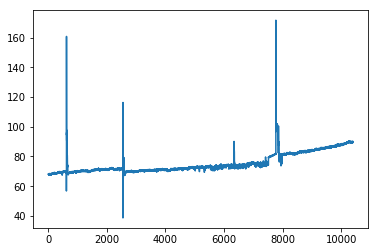

In [9]:
# Видно, что f_8 резко падает в интервале времени (индекс) от 7500 до 7800 - давление при этом линейно растет
# Возможно, установка не работала в это время?
# Сладывается впечатление, что в этой области коэффицент давление не зависит от f_8 и f_8 нужно заменить на константу

sensors['f_8_corr'] = sensors['f_8'] / 250000
sensors['f_8_corr'] = np.where(sensors['f_8_corr'] < 0.3 , 0.7, sensors['f_8_corr'])

plt.plot(sensors['target'] / sensors['f_8_corr'])

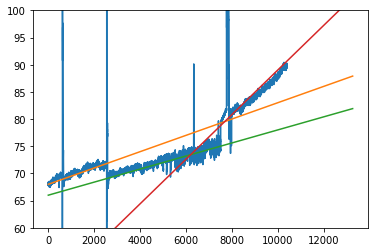

In [10]:
# Подбираем линейную модель по времени для разных участков 
plt.plot(sensors.loc[:, 'target'] / sensors.loc[:, 'f_8_corr'])
plt.plot(0.0015*sensors.index+68)
plt.plot(0.0012*sensors.index+66)
plt.plot(0.0041*sensors.index+48)
plt.ylim((60, 100))
plt.show()

In [13]:
# Export result to sumbission file
sensors['target_predict'] = (48 + 0.0041*sensors.index)*sensors['f_8_corr']
sensors.loc[10400:, ['timestamp', 'target_predict']].rename(columns={'target_predict':'target'}).to_csv('../data/submissions/reactor_pressure_submission.csv', index=False)